# Sentiment Analysis of tweets (Florida vaccination)

In [89]:
# pip install tweepy
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from string import punctuation
from nltk.corpus import stopwords
import re
import nltk
import numpy as np
import pandas as pd

In [2]:
#Running the python script containing API keys
%run C:\\Users\\samrat\\Desktop\\US\\Spring2021\\TextAnalytics\\key.ipynb

In [3]:
auth = tweepy.OAuthHandler(consumer_api_key, consumer_api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# The last command prints a message and waits if the rate limit is exceeded
# Twitter allows 15 requests per application per 15 minutes

## Search query = "florida + vaccine"

In [4]:
df = pd.DataFrame(columns=['screen_name', 'name', 'date_time', 'location', 'text'])

for tweet in tweepy.Cursor(api.search, q="Florida + Vaccine", count=1000, result_type="recent",
                           include_entities=True, lang="en").items():
    df = df.append(pd.Series([tweet.user.screen_name, tweet.user.name, tweet.created_at, tweet.user.location, tweet.text], index=df.columns), ignore_index=True)

df.shape #query results stored in 'df' dataframe

Rate limit reached. Sleeping for: 610


(22760, 5)

In [5]:
df.columns

Index(['screen_name', 'name', 'date_time', 'location', 'text'], dtype='object')

In [6]:
df[['text', 'name', 'date_time']]

,text,name,date_time
0,.@greta\n\nAnalysis: When COVID-19 vaccines we...,Paradise Gram,2021-03-25 00:01:57
1,RT @RemoveRon: Gov Ron DeSantis is taking afte...,Melanie Moore,2021-03-25 00:00:10
2,@newsmax Use the money to stop Johnson &amp;Jo...,Karen E. Durham,2021-03-24 23:57:38
3,RT @FloridaMedical: The FMA covid-19 vaccine r...,Florida Medical Association,2021-03-24 23:57:12
4,RT @RemoveRon: Gov Ron DeSantis is taking afte...,Jeri,2021-03-24 23:52:15
...,...,...,...
22755,RT @DWUhlfelderLaw: Major donors to South Flor...,Mass Voter,2021-03-17 00:46:40
22756,RT @nikkifried: Vaccine distribution in Florid...,Rick Helmuth,2021-03-17 00:45:43
22757,RT @nikkifried: Vaccine distribution in Florid...,Michael L. Kaufman,2021-03-17 00:43:39
22758,RT @DWUhlfelderLaw: Major donors to South Flor...,hopelessforkindess,2021-03-17 00:43:34


In [62]:
#df.to_csv('florida_vaccine_analysis.csv',index=False,encoding='utf-8')

## Cleaning of tweet corpus

In [30]:
blobs = []                #This list holds the cleaned tweets

for i in range(len(df)):
    tweet = df['text'][i]
    tweet = tweet.strip(punctuation).lower()
    tweet = re.sub(r'http\S+', ' ', tweet)
    tweet = re.sub(r'@\S+', ' ', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'[^a-z]+', ' ', tweet)
    tweet = re.sub(r'rt', ' ', tweet)
    
    blobs.append(tweet)

## Model 1 : TextBlob

In [48]:
polarity = []
subjectivity = []

for i in range(len(blobs)):
    xyz = TextBlob(blobs[i])
    polarity.append(xyz.sentiment.polarity)
    subjectivity.append(xyz.sentiment.subjectivity)

In [50]:
df['Polarity'] = polarity
df['subjectivity'] = subjectivity

In [55]:
df['Polarity'].mean()

0.07684558465907082

## Model 2 : Vader

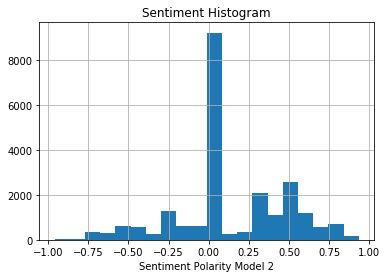

In [60]:
analyzer = SentimentIntensityAnalyzer()
sentiment = {}
pol = [0]*len(df)
    
for i in range(len(df)):
    tweet = df['text'][i]
    sentiment[i] = analyzer.polarity_scores(tweet)
    pol[i] = sentiment[i]['compound']
df['Polarity_1'] = pol

## Results

Model 1 : TextBlob


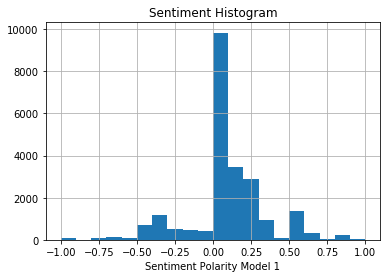

Total Tweets : 22760
Neutral Tweets : 8389
Positive Tweets : 10776
Negative Tweets : 3595


In [138]:
print('Model 1 : TextBlob')
df['Polarity'].hist(bins=20)
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment Polarity Model 1')
plt.show()
print('Total Tweets : ' + str(len(df)))
print('Neutral Tweets : ' + str((df['Polarity'] == 0).sum()))
print('Positive Tweets : ' + str((df['Polarity'] > 0).sum()))
print('Negative Tweets : ' + str((df['Polarity'] < 0).sum()))

Model 2 : Vader


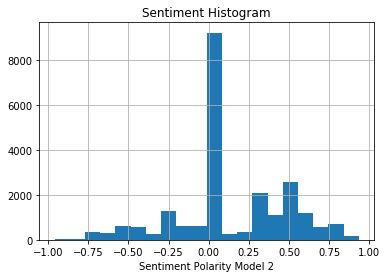

Total Tweets : 22760
Neutral Tweets : 9028
Positive Tweets : 9082
Negative Tweets : 4650


In [137]:
print('Model 2 : Vader')
df['Polarity_1'].hist(bins=20)
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment Polarity Model 2')
plt.show()
print('Total Tweets : ' + str(len(df)))
print('Neutral Tweets : ' + str((df['Polarity_1'] == 0).sum()))
print('Positive Tweets : ' + str((df['Polarity_1'] > 0).sum()))
print('Negative Tweets : ' + str((df['Polarity_1'] < 0).sum()))

## Sample neutral

In [134]:
sentiment = analyzer.polarity_scores('do you think florida should open eligibility for the covid vaccine to all adults')
sentiment

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

## Sample negative

In [128]:
sentiment = analyzer.polarity_scores('wtf i live in florida and still cannot get the vaccine')
sentiment

{'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'compound': -0.5859}

## Sample positive

In [135]:
sentiment = analyzer.polarity_scores('i am happy to say as a year old resident of florida i received my first moderna vaccine this morning ')
sentiment

{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.5719}